- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
 
## IMAGE CLASSFIER USING FASHION IMAGES

#### Author: Sumit Verma

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Case study problem statement:  

Build and delpoy an image classfier using BOOSTING algorithm

### Input data details

Fashion (fashion_mnist) dataset from Keras comes preloaded with  train and test images along with the labels.


Number of images = 70000 
    1. Training images = 60000
    2. Testig images = 10000
    3. Image size = 28 x 28
    4. Channel = 1

Labels: 

    0. T-shirt/top
    1. Trouser
    2. Pullover
    3. Dress
    4. Coat
    5. Sandal
    6. Shirt
    7. Sneaker
    8. Bag
    9. Ankle boot

### Expected output details: 

1. SVM based image classifier
2. Web or UI based deployment for SVM classifier

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Case study approach:

#### Step 1: Universal Library and Package declaration

#### Step 2: Import data to python

#### Step 3: Clean, prepare and validate data 

#### Step 4: Exploratory Data Analysis

#### Step 5: Data Preprocessing for Model Implementation

#### Step 6: Model Design Tuning and Testing

#### Step 7: Model pickling

#### Step 8: Model deployment ( Web or UI )

#### Step 9: Conclusion

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Step 1: Universal Library and Package declaration

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Step 2: Import data to python

In [2]:
# Load fashion MNIST dataset
from keras.datasets import fashion_mnist
#splitting the datsset into training and testing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [3]:
print("Train_LABLES : ",y_train)

Train_LABLES :  [9 0 0 ... 3 0 5]


In [4]:
print("TEST_LABLES : ",y_test)

TEST_LABLES :  [9 2 1 ... 8 1 5]


### Step 3: Clean, prepare and validate data 

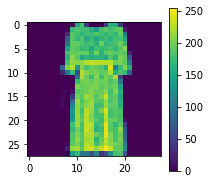

Image (#1902): Which is label number '3', or label 'Dress''


In [5]:
#giving class names to the images in data
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sample = 1902 
each = x_train[sample]

plt.figure(figsize=(3,3))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image (#{}): Which is label number '{}', or label '{}''".format(sample,y_train[sample], labelNames[y_train[sample]]))

### Step 4: Exploratory Data Analysis

To verify that the data let's display the Random images from the training set and display the class name below each image.

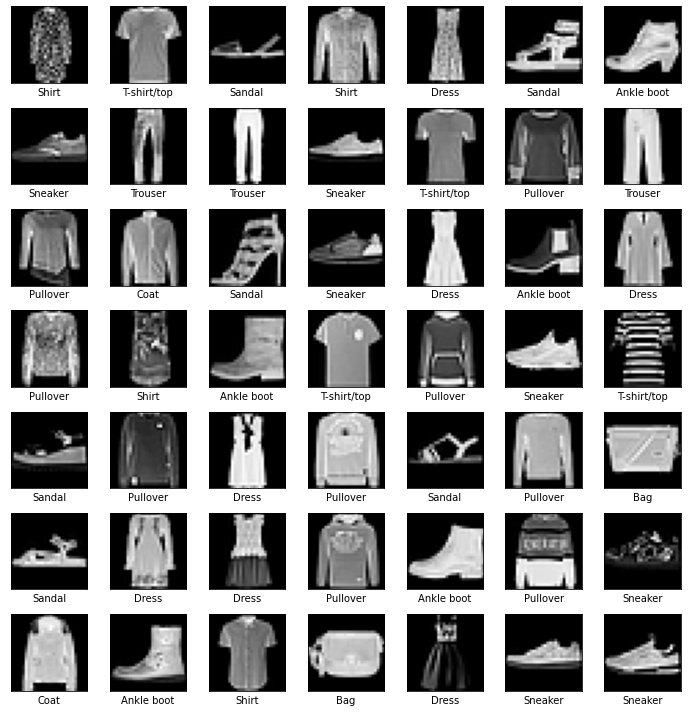

In [6]:
#Sample images
ROW = 7
COLUMN = 7
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    temp = random.randint(0, len(x_train)+1)
    image = x_train[temp] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[y_train[temp]])
    plt.tight_layout()   
    
plt.show()

### Step 5: Data Preprocessing for Model Implementation

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

Scale these values to a range of 0 to 1 before feeding them machine model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [7]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [8]:
#let's reshape the data so that we can train our machine..
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [78]:
#caaling the library for training
from sklearn.svm import SVC

svc = SVC(C=1, kernel='linear', gamma="auto")
#fitting the data into machine
svc.fit(x_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

# Confusion matrix
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [10]:
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Making predictions and accuracy scores and other reports as well

-----------------SVM Report---------------
F1 score: 0.845599053028593
Accuracy score: 0.8463
Confusion matrix: 
 [[815   2  13  45   4   1 108   0  12   0]
 [  6 962   2  22   3   0   4   0   1   0]
 [ 22   6 769   8 109   0  79   0   7   0]
 [ 54  15  19 842  27   0  40   0   3   0]
 [  1   2 114  33 773   0  72   0   5   0]
 [  1   0   0   1   0 936   0  38   3  21]
 [174   2 122  30  93   0 562   0  17   0]
 [  0   0   0   0   0  38   0 934   1  27]
 [ 12   1   8   8   2  15  25   4 925   0]
 [  0   0   0   0   0  15   1  39   0 945]]
Plotting confusion matrix


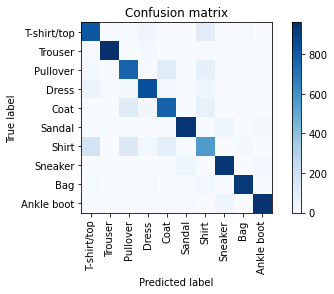

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.77      0.75      1000
           3       0.85      0.84      0.85      1000
           4       0.76      0.77      0.77      1000
           5       0.93      0.94      0.93      1000
           6       0.63      0.56      0.59      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.93      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [11]:
# SVM report and analysis
y_pred_svc = svc.predict(x_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))

In [12]:
#printing the predicted values
y_pred_svc

array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [13]:
y_pred_svc[0]

9

Verify predictions With the without pca model trained, you can use it to make predictions about some images.

Let's look at the 4th image, predictions and Correct prediction labels are blue and incorrect prediction labels are red.

now we have to reshape the data with original shape so that image can be plotted and predicted succesfully

In [14]:
x_test = x_test.reshape(10000,28,28)

In [15]:
def plot_image(i, predicted_value, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_value == true_label:
        color = 'blue'
    else:
        color = 'red'
    print("Predicted: ",predicted_value,"|||"+" Actual: ",true_label)
    plt.xlabel("Predicted: {} || Actual: {}".format(labelNames[predicted_value],
                                labelNames[true_label]),
                                color=color)


Predicted:  9 ||| Actual:  9


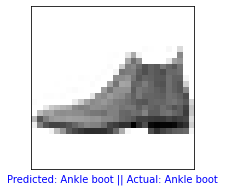

In [16]:
i = 0
plt.figure(figsize=(6,3))
plot_image(i, y_pred_svc[i], y_test, x_test)
plt.show()

### Step 6: Model Design Tuning and Testing

# Features Extraction using PCA
In this section, I attempt to use PCA to reduce the number of features

Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.

In [17]:
from sklearn.decomposition import PCA

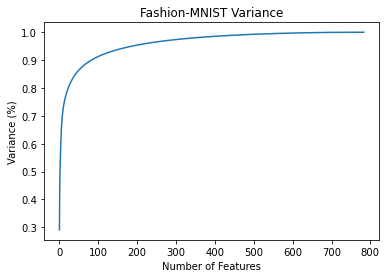

In [18]:
# fit the PCA with the training data
pca = PCA().fit(x_train)

# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Fashion-MNIST Variance')
plt.show()

after 340 curves looks like constant so we took 340 as number of compnents for PCA

In [19]:
pca = PCA(n_components=340)
pca.fit(x_train)

PCA(n_components=340)

In [20]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [21]:
#transforming the data
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)


In [22]:
x_train_pca.shape

(60000, 340)

In [23]:
# SVM Model

svc = SVC(C=1, kernel='linear', gamma="auto")
#fitting the data
svc.fit(x_train_pca, y_train)


SVC(C=1, gamma='auto', kernel='linear')

-----------------SVM Report---------------
F1 score: 0.8488642866398163
Accuracy score: 0.8499
Confusion matrix: 
 [[820   5  12  46   5   1 101   0  10   0]
 [  4 963   3  24   3   0   2   0   1   0]
 [ 22   6 765   8 110   0  81   0   8   0]
 [ 42  16   9 863  26   0  37   0   7   0]
 [  2   1 115  37 763   0  79   0   3   0]
 [  1   0   0   1   0 932   0  47   1  18]
 [160   1 120  39  94   0 567   0  19   0]
 [  0   0   0   0   0  33   0 943   1  23]
 [ 10   2   8  10   4   7  14   7 938   0]
 [  0   0   0   0   0  12   1  42   0 945]]
Plotting confusion matrix


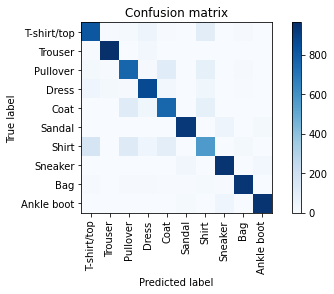

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.74      0.77      0.75      1000
           3       0.84      0.86      0.85      1000
           4       0.76      0.76      0.76      1000
           5       0.95      0.93      0.94      1000
           6       0.64      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.95      0.94      0.94      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [24]:
# SVM report and analysis
y_pred_svc_pca = svc.predict(x_test_pca)
svc_pca_f1 = metrics.f1_score(y_test, y_pred_svc_pca, average= "weighted")
svc_pca_accuracy = metrics.accuracy_score(y_test, y_pred_svc_pca)
svc_pca_cm = metrics.confusion_matrix(y_test, y_pred_svc_pca)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_pca_f1))
print("Accuracy score: {}".format(svc_pca_accuracy))
print("Confusion matrix: \n", svc_pca_cm)
print('Plotting confusion matrix')
#plotting 
plt.figure()
plot_confusion_matrix(svc_pca_cm, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc_pca)

Verify predictions With the pca_ model trained, you can use it to make predictions about some images.

Let's look at the 4th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red.

now we have to reshape the data with original shape so that image can be plotted and predicted succesfully

In [25]:
x_test = x_test.reshape(10000,28,28)

Predicted:  6 ||| Actual:  6


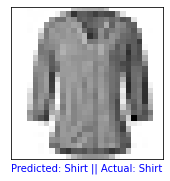

In [26]:
i = 4
plt.figure(figsize=(6,3))
plot_image(i, y_pred_svc_pca[i], y_test, x_test)
plt.show()

Let's plot several images with their predictions. 

it can also predict some images wrongly even if model has good accuracy

Predicted:  9 ||| Actual:  9
Predicted:  2 ||| Actual:  2
Predicted:  1 ||| Actual:  1
Predicted:  1 ||| Actual:  1
Predicted:  6 ||| Actual:  6
Predicted:  1 ||| Actual:  1
Predicted:  4 ||| Actual:  4
Predicted:  6 ||| Actual:  6
Predicted:  5 ||| Actual:  5
Predicted:  7 ||| Actual:  7
Predicted:  4 ||| Actual:  4
Predicted:  5 ||| Actual:  5
Predicted:  5 ||| Actual:  7
Predicted:  3 ||| Actual:  3
Predicted:  4 ||| Actual:  4


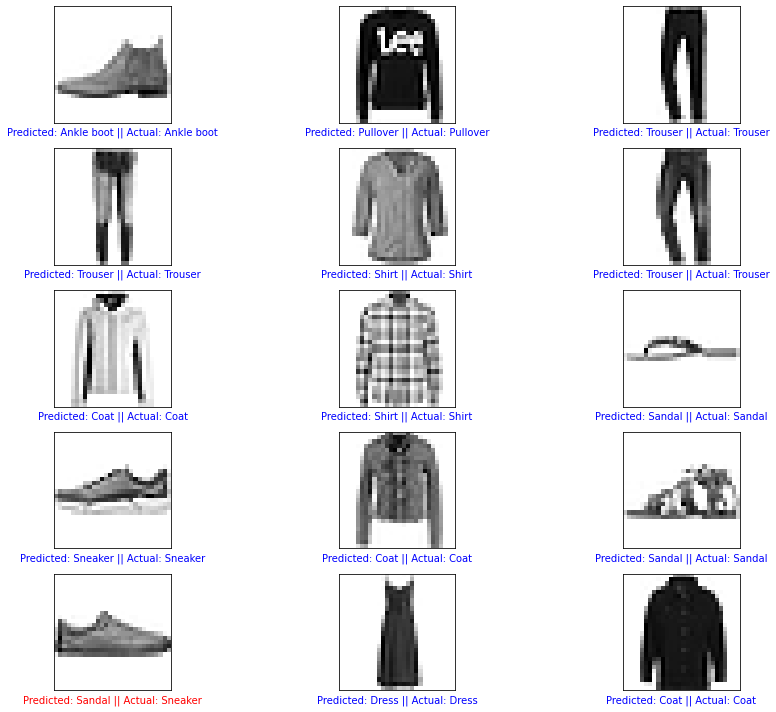

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_pred_svc_pca[i], y_test, x_test)
plt.tight_layout()
plt.show()

### Step 8: Model pickling

In [28]:
import pickle

In [79]:
#save the model
pickle.dump(svc, open('model1.pkl','wb'))

In [30]:
# Loading model to compare the results
model = pickle.load(open('model1.pkl','rb'))

-----------------SVM Report---------------
F1 score: 0.8488642866398163
Accuracy score: 0.8499
Confusion matrix: 
 [[820   5  12  46   5   1 101   0  10   0]
 [  4 963   3  24   3   0   2   0   1   0]
 [ 22   6 765   8 110   0  81   0   8   0]
 [ 42  16   9 863  26   0  37   0   7   0]
 [  2   1 115  37 763   0  79   0   3   0]
 [  1   0   0   1   0 932   0  47   1  18]
 [160   1 120  39  94   0 567   0  19   0]
 [  0   0   0   0   0  33   0 943   1  23]
 [ 10   2   8  10   4   7  14   7 938   0]
 [  0   0   0   0   0  12   1  42   0 945]]
Plotting confusion matrix


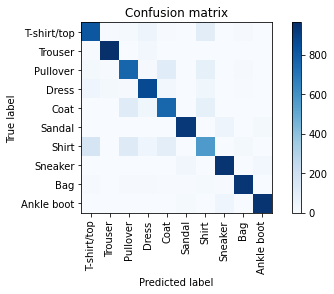

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.74      0.77      0.75      1000
           3       0.84      0.86      0.85      1000
           4       0.76      0.76      0.76      1000
           5       0.95      0.93      0.94      1000
           6       0.64      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.95      0.94      0.94      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [32]:
# SVM report and analysis
y_pred_svc_pca1 = model.predict(x_test_pca)
svc_pca_f1_1 = metrics.f1_score(y_test, y_pred_svc_pca1, average= "weighted")
svc_pca_accuracy1 = metrics.accuracy_score(y_test, y_pred_svc_pca1)
svc_pca_cm1 = metrics.confusion_matrix(y_test, y_pred_svc_pca1)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svc_pca_f1_1))
print("Accuracy score: {}".format(svc_pca_accuracy1))
print("Confusion matrix: \n", svc_pca_cm1)
print('Plotting confusion matrix')
#plotting 
plt.figure()
plot_confusion_matrix(svc_pca_cm1, labelNames)
plt.show()

print(metrics.classification_report(y_test, y_pred_svc_pca1))

### Step 9: Model deployment  ( Web or UI )

Gradio allows you to quickly create customizable UI components around your TensorFlow or PyTorch models, or even arbitrary Python functions. Mix and match components to support any combination of inputs and outputs. Our core library is free and open-source!

Generate an easy-to-use UI for your ML model, function, or API with only a few lines of code. Integrate directly into your Python notebook, or share a link with anyone.

In [37]:
import gradio as gr

In [93]:
def classify_image(image):
    prediction = model.predict(image.reshape(-1, 28, 28, 1)).tolist()[0]
    return {class_names[i]: prediction[i] for i in range(10)}
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [94]:
#sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes=3)
gr.Interface(fn=classify_image, 
             inputs='sketchpad',
             outputs=label,
             interpretation="default",
             ).launch()

Running locally at: http://127.0.0.1:7877/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7877/', None)

### Step 10: Conclusion

AS we seen From the above Case study  when we apply ML algorithm to whole data set it will took more time and gave accuracy of about 84.6 percent and when we applied PCA for dimensionality reduction on data it will reduce data to 340 features as compared to 784 in whole data and Training pca data give us 85 percent of accuracy which is good as compared to simple data..... so to conclude that PCA is usefull for our data and it takes only important features which cover the 95 percent of variance in data